## CSE676: Deep Learning 
### Project: Sentiment analysis on IMDb Movie Reviews dataset
### Sanchit Krishna Anandraj , Abhinandan Vijan , Satvik Singh

## Importing relevant libaries to perform cleaning and EDA steps

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from collections import Counter

## Reading data from a csv file and store it in a pandas data frame.

In [5]:
df = pd.read_csv('IMDB Dataset.csv')

## Data Statistics

In [7]:
df.shape

(50000, 2)

In [8]:
df.dtypes

review       object
sentiment    object
dtype: object

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## Handling mising data

In [12]:
missing_data = df.isnull().sum()
print(missing_data)

review       0
sentiment    0
dtype: int64


In [13]:

print(df['review'].duplicated().sum())

418


In [14]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [15]:
df.shape

(49582, 2)

## Encoding the target column

In [17]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative': 0})

In [18]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## Visualizing sentiment distribution

In [20]:
pos_count = df['sentiment'].eq(1).sum()
neg_count = df['sentiment'].eq(0).sum()

print("positive sentiment count",  pos_count )
print("negative sentiment count",  neg_count )


positive sentiment count 24884
negative sentiment count 24698


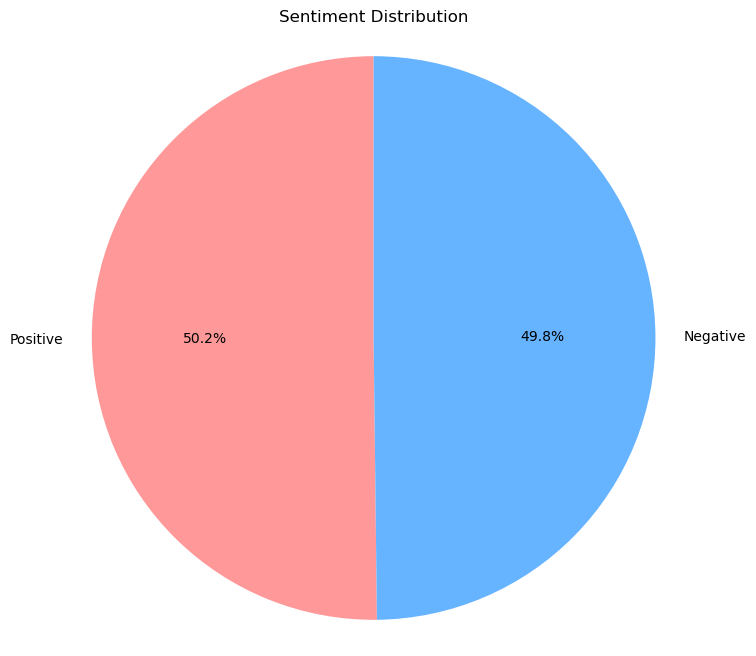

In [21]:
# Calculate the value counts for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90, colors= ['#ff9999','#66b3ff'])
plt.title('Sentiment Distribution')
plt.axis('equal') 
plt.show()


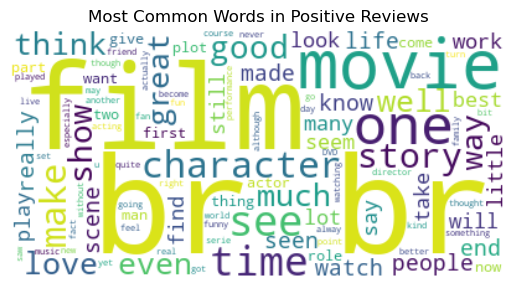

In [22]:
positive_reviews = df[df['sentiment'] == 1]
positive_text = ' '.join(positive_reviews['review'])
wordcloud = WordCloud(max_words=100, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

In [23]:

positive_text = ' '.join(positive_reviews['review'])
word_counts = Counter(positive_text.split())

common_words = word_counts.most_common(100)

common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df



,Word,Frequency
0,the,290932
1,and,165372
2,a,155251
3,of,148673
4,to,127921
...,...,...
95,think,6493
96,do,6377
97,two,6130
98,make,6101


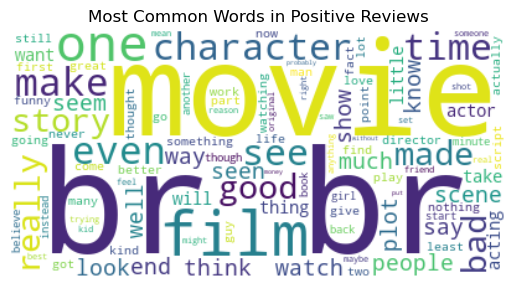

In [24]:
negative_reviews = df[df['sentiment'] == 0]
negative_text = ' '.join(negative_reviews['review'])
wordcloud = WordCloud(max_words=100, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

In [25]:
negative_reviews = df[df['sentiment'] == 0]
negative_text = ' '.join(negative_reviews['review'])
word_counts = Counter(negative_text.split())

common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization (optional)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df



,Word,Frequency
0,the,273542
1,a,149568
2,and,134388
3,of,132924
4,to,131974
...,...,...
95,think,6486
96,too,6327
97,being,6196
98,its,6157


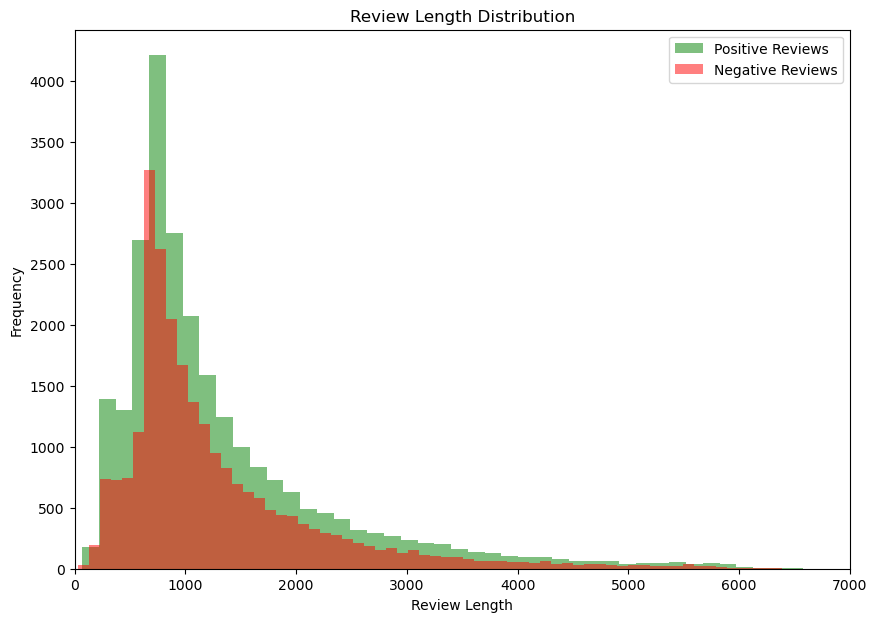

In [26]:
df['review_length'] = df['review'].apply(len)

positive_reviews = df[df['sentiment'] == 1]
negative_reviews = df[df['sentiment'] == 0]

# Plot histograms for positive and negative reviews in a single plot
plt.figure(figsize=(10, 7))
plt.hist(positive_reviews['review_length'], bins=90, color='green', alpha=0.5, label='Positive Reviews')
plt.hist(negative_reviews['review_length'], bins=90, color='red', alpha=0.5, label='Negative Reviews')

plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.xlim(0, 7000)
plt.legend()
plt.show()

## Splitting the dataset 

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.2)

In [28]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),                                                   
    ('random_forest', (RandomForestClassifier(n_estimators=10, criterion='entropy')))      
])

clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=10))])

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77      4918
           1       0.80      0.69      0.74      4999

    accuracy                           0.75      9917
   macro avg       0.76      0.75      0.75      9917
weighted avg       0.76      0.75      0.75      9917



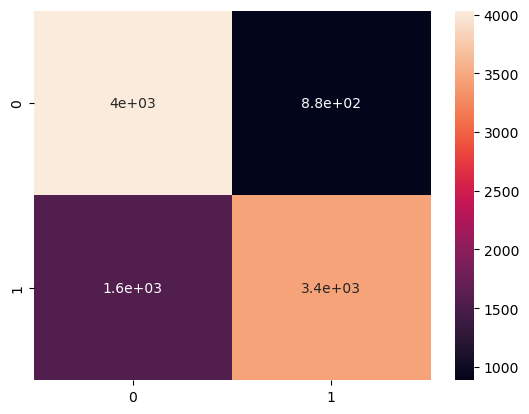

In [29]:
import seaborn as sns
Y_pred = clf.predict(X_test)
print('Classification Report:\n',classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [30]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer', CountVectorizer()),                                                   
    ('NB', MultinomialNB())      
])

clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('NB', MultinomialNB())])

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      4918
           1       0.87      0.81      0.84      4999

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.85      0.84      0.84      9917



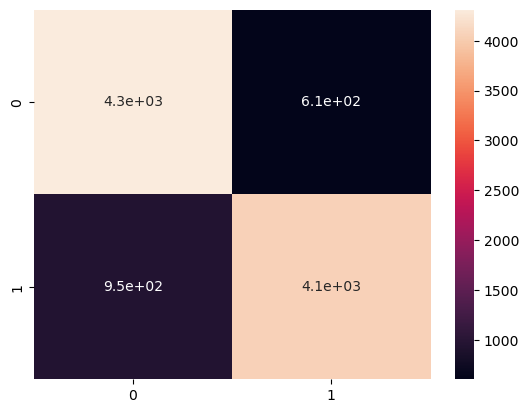

In [31]:
Y_pred = clf.predict(X_test)
print('Classification Report:\n',classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True)
plt.show()